In [1]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import networkx as nx
from skimage.morphology import skeletonize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [59]:
# Load  dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [60]:
images_train = x_train
images_test = x_test

In [61]:
k = 0

# Preprocessing Images

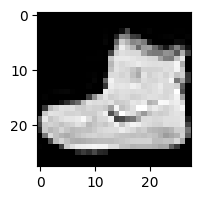

In [69]:
plt.figure(figsize=(2, 2))
plt.imshow(images_train[k], interpolation='nearest', cmap='gray')
plt.show()

In [89]:
def convert_edgedetection(images):
    edge_detection = []
    for image in images:
        if image.shape[-1] == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
        
        # Apply Gaussian blur to reduce noise and smoothen edges 
        blurred = cv2.GaussianBlur(src=image, ksize=(3, 3), sigmaX=1, sigmaY=1) 
      
        # Perform Canny edge detection 
        edges = cv2.Canny(blurred, 225, 250)
        edge_detection.append(edges)
    return edge_detection

In [90]:
edge_detection_train = convert_edgedetection(images_train)
edge_detection_test = convert_edgedetection(images_test)

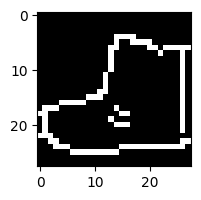

In [91]:
plt.figure(figsize=(2, 2))
plt.imshow(edge_detection_train[k], interpolation='nearest', cmap='gray')
plt.show()

In [93]:
images_train = edge_detection_train
images_test = edge_detection_test

In [94]:
def convert_binary(images):
    binary_images = []
    for image in images:
        _, thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
        binary_images.append(thresholded)
    return binary_images

In [95]:
binary_images_train = convert_binary(images_train)
binary_images_test = convert_binary(images_test)

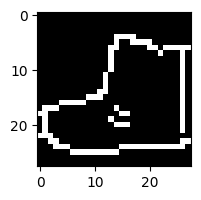

In [96]:
plt.figure(figsize=(2, 2))
plt.imshow(binary_images_train[k], cmap='gray')
plt.show()

In [97]:
def convert_skeletonize(binary_images):
    skeletonized_images = []
    for binary_image in binary_images:
        skeletonized_image = skeletonize(binary_image)
        skeletonized_images.append(skeletonized_image.astype(np.uint8))
    return skeletonized_images

In [98]:
skeletonized_images_train = convert_skeletonize(binary_images_train)
skeletonized_images_test = convert_skeletonize(binary_images_test)

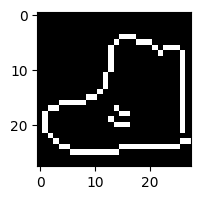

In [99]:
plt.figure(figsize=(2, 2))
plt.imshow(skeletonized_images_train[k], cmap='gray')
plt.show()

# Creating Graph

In [100]:
def create_nodes(skeletonized_images):
    nodes_list = []
    node_features_list = []
    for skeletonized_image in skeletonized_images:
        nodes = []
        features = []
        for i in range(skeletonized_image.shape[0]):
            for j in range(skeletonized_image.shape[1]):
                if skeletonized_image[i, j] == 1:
                    nodes.append((i, j))
                    features.append([i, j])
        nodes_list.append(nodes)
        node_features_list.append(features)
    return nodes_list, node_features_list

In [101]:
nodes_list_train, node_features_list_train = create_nodes(skeletonized_images_train)
nodes_list_test, node_features_list_test = create_nodes(skeletonized_images_test)

In [102]:
nodes_list_train[k]

[(4, 15),
 (4, 16),
 (4, 17),
 (5, 14),
 (5, 18),
 (5, 19),
 (5, 20),
 (6, 13),
 (6, 21),
 (6, 23),
 (6, 24),
 (6, 25),
 (7, 13),
 (7, 22),
 (7, 26),
 (8, 13),
 (8, 26),
 (9, 13),
 (9, 26),
 (10, 13),
 (10, 26),
 (11, 12),
 (11, 26),
 (12, 12),
 (12, 26),
 (13, 12),
 (13, 26),
 (14, 11),
 (14, 26),
 (15, 9),
 (15, 10),
 (15, 26),
 (16, 4),
 (16, 5),
 (16, 6),
 (16, 7),
 (16, 8),
 (16, 26),
 (17, 2),
 (17, 3),
 (17, 14),
 (17, 26),
 (18, 1),
 (18, 15),
 (18, 16),
 (18, 26),
 (19, 1),
 (19, 13),
 (19, 26),
 (20, 1),
 (20, 14),
 (20, 15),
 (20, 16),
 (20, 26),
 (21, 1),
 (21, 26),
 (22, 2),
 (23, 3),
 (23, 26),
 (23, 27),
 (24, 4),
 (24, 5),
 (24, 15),
 (24, 16),
 (24, 17),
 (24, 18),
 (24, 19),
 (24, 20),
 (24, 21),
 (24, 22),
 (24, 23),
 (24, 24),
 (24, 25),
 (25, 6),
 (25, 7),
 (25, 8),
 (25, 9),
 (25, 10),
 (25, 11),
 (25, 12),
 (25, 13),
 (25, 14)]

In [103]:
node_features_list_train[k]

[[4, 15],
 [4, 16],
 [4, 17],
 [5, 14],
 [5, 18],
 [5, 19],
 [5, 20],
 [6, 13],
 [6, 21],
 [6, 23],
 [6, 24],
 [6, 25],
 [7, 13],
 [7, 22],
 [7, 26],
 [8, 13],
 [8, 26],
 [9, 13],
 [9, 26],
 [10, 13],
 [10, 26],
 [11, 12],
 [11, 26],
 [12, 12],
 [12, 26],
 [13, 12],
 [13, 26],
 [14, 11],
 [14, 26],
 [15, 9],
 [15, 10],
 [15, 26],
 [16, 4],
 [16, 5],
 [16, 6],
 [16, 7],
 [16, 8],
 [16, 26],
 [17, 2],
 [17, 3],
 [17, 14],
 [17, 26],
 [18, 1],
 [18, 15],
 [18, 16],
 [18, 26],
 [19, 1],
 [19, 13],
 [19, 26],
 [20, 1],
 [20, 14],
 [20, 15],
 [20, 16],
 [20, 26],
 [21, 1],
 [21, 26],
 [22, 2],
 [23, 3],
 [23, 26],
 [23, 27],
 [24, 4],
 [24, 5],
 [24, 15],
 [24, 16],
 [24, 17],
 [24, 18],
 [24, 19],
 [24, 20],
 [24, 21],
 [24, 22],
 [24, 23],
 [24, 24],
 [24, 25],
 [25, 6],
 [25, 7],
 [25, 8],
 [25, 9],
 [25, 10],
 [25, 11],
 [25, 12],
 [25, 13],
 [25, 14]]

In [104]:
def create_graph(nodes_list, skeletonized_images):
    graphs = []
    sparse_graphs = []
    for nodes, image in zip(nodes_list, skeletonized_images):
        # Create a graph
        G = nx.Graph()

        # Add nodes for white pixels
        G.add_nodes_from(nodes)
        for i, j in nodes:
            for x in range(-1, 2):
                for y in range(-1, 2):
                    if 0 <= i + x < image.shape[0] and 0 <= j + y < image.shape[1] and (x != 0 or y != 0) and image[i + x, j + y] == 1:
                        G.add_edge((i, j), (i + x, j + y))
        graphs.append(G)
        sparse_graphs.append(nx.adjacency_matrix(G))
    return graphs, sparse_graphs

In [105]:
graphs_train, sparse_graphs_train = create_graph(nodes_list_train, skeletonized_images_train)
graphs_test, sparse_graphs_test = create_graph(nodes_list_test, skeletonized_images_test)

In [106]:
nodes_dict_train = [{value: index for index, value in enumerate(list)} for list in nodes_list_train]
nodes_dict_test = [{value: index for index, value in enumerate(list)} for list in nodes_list_test]

In [107]:
nodes_dict_train[k]

{(4, 15): 0,
 (4, 16): 1,
 (4, 17): 2,
 (5, 14): 3,
 (5, 18): 4,
 (5, 19): 5,
 (5, 20): 6,
 (6, 13): 7,
 (6, 21): 8,
 (6, 23): 9,
 (6, 24): 10,
 (6, 25): 11,
 (7, 13): 12,
 (7, 22): 13,
 (7, 26): 14,
 (8, 13): 15,
 (8, 26): 16,
 (9, 13): 17,
 (9, 26): 18,
 (10, 13): 19,
 (10, 26): 20,
 (11, 12): 21,
 (11, 26): 22,
 (12, 12): 23,
 (12, 26): 24,
 (13, 12): 25,
 (13, 26): 26,
 (14, 11): 27,
 (14, 26): 28,
 (15, 9): 29,
 (15, 10): 30,
 (15, 26): 31,
 (16, 4): 32,
 (16, 5): 33,
 (16, 6): 34,
 (16, 7): 35,
 (16, 8): 36,
 (16, 26): 37,
 (17, 2): 38,
 (17, 3): 39,
 (17, 14): 40,
 (17, 26): 41,
 (18, 1): 42,
 (18, 15): 43,
 (18, 16): 44,
 (18, 26): 45,
 (19, 1): 46,
 (19, 13): 47,
 (19, 26): 48,
 (20, 1): 49,
 (20, 14): 50,
 (20, 15): 51,
 (20, 16): 52,
 (20, 26): 53,
 (21, 1): 54,
 (21, 26): 55,
 (22, 2): 56,
 (23, 3): 57,
 (23, 26): 58,
 (23, 27): 59,
 (24, 4): 60,
 (24, 5): 61,
 (24, 15): 62,
 (24, 16): 63,
 (24, 17): 64,
 (24, 18): 65,
 (24, 19): 66,
 (24, 20): 67,
 (24, 21): 68,
 (24, 22):

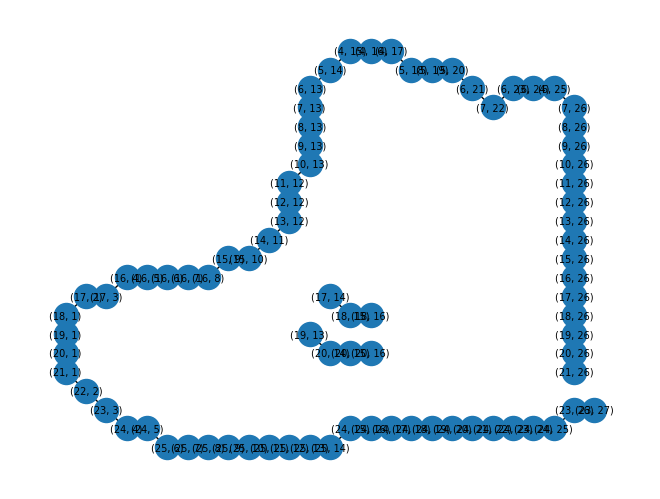

In [108]:
pos = {(i, j): (j, -i) for i, j in graphs_train[k].nodes()}
nx.draw(graphs_train[k], pos, with_labels=True, font_size=7)
plt.show()

In [109]:
sparse_graphs_train[k]

<82x82 sparse array of type '<class 'numpy.intc'>'
	with 158 stored elements in Compressed Sparse Row format>

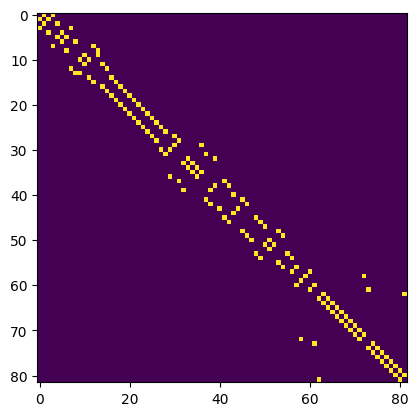

In [110]:
plt.imshow(sparse_graphs_train[k].todense(), cmap='viridis')

In [111]:
# # Old Method of Creating Edge Index
# def create_edge_index(sparse_graph):
#     edges = []
#     edge_from = []
#     edge_to = []
#     num_nodes = sparse_graph.shape[0]
#     for i in range(num_nodes):
#         for j in range(i + 1, num_nodes):
#             if sparse_graph[i, j] == 1:
#                 edge_from.append(i)
#                 edge_to.append(j)
#                 # edge_from.append(j)
#                 # edge_to.append(i)
#     edges.append(edge_from)
#     edges.append(edge_to)
#     return np.array(edges)

In [112]:
def create_edge_index(graph, nodes_dict):
    edges = []
    edge_from = []
    edge_to = []
    for (i, j) in graph.edges():
        edge_from.append(nodes_dict[i])
        edge_to.append(nodes_dict[j])
        # edge_from.append(nodes_dict[j])
        # edge_to.append(nodes_dict[i])
    edges.append(edge_from)
    edges.append(edge_to)
    return np.array(edges)


In [113]:
graphs_train[k].edges()

EdgeView([((4, 15), (4, 16)), ((4, 15), (5, 14)), ((4, 16), (4, 17)), ((4, 17), (5, 18)), ((5, 14), (6, 13)), ((5, 18), (5, 19)), ((5, 19), (5, 20)), ((5, 20), (6, 21)), ((6, 13), (7, 13)), ((6, 21), (7, 22)), ((6, 23), (6, 24)), ((6, 23), (7, 22)), ((6, 24), (6, 25)), ((6, 25), (7, 26)), ((7, 13), (8, 13)), ((7, 26), (8, 26)), ((8, 13), (9, 13)), ((8, 26), (9, 26)), ((9, 13), (10, 13)), ((9, 26), (10, 26)), ((10, 13), (11, 12)), ((10, 26), (11, 26)), ((11, 12), (12, 12)), ((11, 26), (12, 26)), ((12, 12), (13, 12)), ((12, 26), (13, 26)), ((13, 12), (14, 11)), ((13, 26), (14, 26)), ((14, 11), (15, 10)), ((14, 26), (15, 26)), ((15, 9), (15, 10)), ((15, 9), (16, 8)), ((15, 26), (16, 26)), ((16, 4), (16, 5)), ((16, 4), (17, 3)), ((16, 5), (16, 6)), ((16, 6), (16, 7)), ((16, 7), (16, 8)), ((16, 26), (17, 26)), ((17, 2), (17, 3)), ((17, 2), (18, 1)), ((17, 14), (18, 15)), ((17, 26), (18, 26)), ((18, 1), (19, 1)), ((18, 15), (18, 16)), ((18, 26), (19, 26)), ((19, 1), (20, 1)), ((19, 13), (20,

In [114]:
edges_index_list_train = [create_edge_index(graphs_train[i], nodes_dict_train[i]) for i in range(len(images_train))]
edges_index_list_test = [create_edge_index(graphs_test[i], nodes_dict_test[i]) for i in range(len(images_test))]

In [115]:
# edges_index_list_train = [create_edge_index(sparse_graphs_train[i]) for i in range(len(images_train))]
# edges_index_list_test = [create_edge_index(sparse_graphs_test[i]) for i in range(len(images_test))]

In [116]:
edges_index_list_train[k]

array([[ 0,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,  9, 10, 11, 12, 14,
        15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 29,
        31, 32, 32, 33, 34, 35, 37, 38, 38, 40, 41, 42, 43, 45, 46, 47,
        48, 49, 50, 51, 53, 54, 56, 57, 58, 58, 60, 61, 62, 62, 63, 64,
        65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80],
       [ 1,  3,  2,  4,  7,  5,  6,  8, 12, 13, 10, 13, 11, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 30, 36,
        37, 33, 39, 34, 35, 36, 41, 39, 42, 43, 45, 46, 44, 48, 49, 50,
        53, 54, 51, 52, 55, 56, 57, 60, 59, 72, 61, 73, 63, 81, 64, 65,
        66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81]])

In [117]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GraphConv, global_mean_pool, global_add_pool
from torch_geometric.data import Data, Dataset
from torch_geometric.loader import DataLoader


# Making Dataset

In [118]:
class CustomGraphDataset(Dataset):
    def __init__(self, data_list):
        super(CustomGraphDataset, self).__init__()
        self.data_list = data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        return self.data_list[idx]

    # Additional abstract methods to implement
    def get(self, idx):
        # Implement logic to retrieve data at the given index
        return self.data_list[idx]

    def len(self):
        # Implement logic to return the length of the dataset
        return len(self.data_list)

In [119]:
def create_custom_data_instance(node_features, edges, label):
    x = torch.tensor(node_features, dtype=torch.float)
    edge_index = torch.tensor(edges, dtype=torch.long)
    y = torch.tensor([label], dtype=torch.long)
    return Data(x=x, edge_index=edge_index, y=y)

In [120]:
data_list_train = [create_custom_data_instance(node_features_list_train[i], edges_index_list_train[i], y_train[i]) for i in range(len(images_train))]
custom_dataset_train = CustomGraphDataset(data_list_train)

data_list_test = [create_custom_data_instance(node_features_list_test[i], edges_index_list_test[i], y_test[i]) for i in range(len(images_test))]
custom_dataset_test = CustomGraphDataset(data_list_test)

In [121]:
num_features = custom_dataset_train.num_features
num_classes = custom_dataset_train.num_classes

In [122]:
# dataset = TUDataset(root='data/TUDataset', name='ENZYMES', transform=NormalizeFeatures())
# Split the dataset into training and testing sets
# train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

train_dataset, test_dataset = custom_dataset_train, custom_dataset_test


In [123]:
# Use PyTorch DataLoader to handle batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [124]:
train_dataset

CustomGraphDataset(60000)

In [125]:
test_dataset

CustomGraphDataset(10000)

In [126]:
train_dataset[k]

Data(x=[82, 2], edge_index=[2, 79], y=[1])

In [127]:
print(f'Number of Features: {num_features}, Number of Classes: {num_classes}')

Number of Features: 2, Number of Classes: 10


Graph Neural Network for Graph Classification

In [128]:
class GCNClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCNClassifier, self).__init__()
        self.conv1 = GraphConv(input_dim, hidden_dim[0])
        self.conv2 = GraphConv(hidden_dim[0], hidden_dim[1])
        self.conv3 = GraphConv(hidden_dim[1], hidden_dim[2])
        self.conv4 = GraphConv(hidden_dim[2], output_dim)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        # x = F.dropout(x, p=0.2)
        x = F.relu(self.conv2(x, edge_index))
        # x = F.dropout(x, p=0.2)
        x = F.relu(self.conv3(x, edge_index))
        # x = F.dropout(x, p=0.2)
        x = F.relu(self.conv4(x, edge_index))
        # x = F.dropout(x, p=0.2)
        x = global_mean_pool(x, batch)
        # x = global_add_pool(x, batch)
        return F.log_softmax(x, dim=1)

In [129]:
# Instantiate the Graph Autoencoder model
input_dim = num_features
hidden_dim = [32, 16, 16]
output_dim = num_classes
gcnClassifier = GCNClassifier(input_dim, hidden_dim, output_dim)
# model = GraphAutoencoder(input_dim, hidden_dim)

# Define the optimizer
optimizer = torch.optim.Adam(gcnClassifier.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()


In [130]:
# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    gcnClassifier.train()
    for data in train_loader:
        optimizer.zero_grad()
        output = gcnClassifier(data)
        loss = criterion(output, data.y)
        loss.backward()
        optimizer.step()

    print(f'GCN Classifier - Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

GCN Classifier - Epoch 1/20, Loss: 1.0090868473052979
GCN Classifier - Epoch 2/20, Loss: 0.9437790513038635
GCN Classifier - Epoch 3/20, Loss: 0.5945966839790344
GCN Classifier - Epoch 4/20, Loss: 0.7871347665786743
GCN Classifier - Epoch 5/20, Loss: 0.6645874381065369
GCN Classifier - Epoch 6/20, Loss: 0.5807465314865112
GCN Classifier - Epoch 7/20, Loss: 0.7872803807258606
GCN Classifier - Epoch 8/20, Loss: 0.5341326594352722
GCN Classifier - Epoch 9/20, Loss: 0.603254497051239
GCN Classifier - Epoch 10/20, Loss: 0.43742263317108154
GCN Classifier - Epoch 11/20, Loss: 0.5751529335975647
GCN Classifier - Epoch 12/20, Loss: 0.5465785264968872
GCN Classifier - Epoch 13/20, Loss: 0.27308955788612366
GCN Classifier - Epoch 14/20, Loss: 0.6750303506851196
GCN Classifier - Epoch 15/20, Loss: 0.47631609439849854
GCN Classifier - Epoch 16/20, Loss: 0.4843830168247223
GCN Classifier - Epoch 17/20, Loss: 0.500722348690033
GCN Classifier - Epoch 18/20, Loss: 0.47074654698371887
GCN Classifier - 

In [131]:
# Evaluation
gcnClassifier.eval()
correct = 0
total = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        output = gcnClassifier(data)
        _, predicted = torch.max(output, 1)
        total += data.y.size(0)
        correct += (predicted == data.y).sum().item()

        # Collect predictions and ground truth for later metric calculation
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(data.y.cpu().numpy())

# Print classification report
print("Classification Report:\n", classification_report(all_labels, all_predicted,zero_division=1))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74      1000
           1       0.96      0.92      0.94      1000
           2       0.65      0.66      0.65      1000
           3       0.76      0.80      0.78      1000
           4       0.60      0.69      0.64      1000
           5       0.80      0.92      0.85      1000
           6       0.54      0.30      0.39      1000
           7       0.86      0.83      0.85      1000
           8       0.80      0.94      0.86      1000
           9       0.94      0.86      0.90      1000

    accuracy                           0.77     10000
   macro avg       0.76      0.77      0.76     10000
weighted avg       0.76      0.77      0.76     10000



Graph Autoencoder using GNN


In [57]:
class GraphAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(GraphAutoencoder, self).__init__()

        # Encoder layers
        self.conv1 = GraphConv(input_dim, hidden_dim[0])
        self.conv2 = GraphConv(hidden_dim[0], hidden_dim[1])
        self.conv3 = GraphConv(hidden_dim[1], hidden_dim[2])
        self.conv4 = GraphConv(hidden_dim[2], latent_dim)

        # Decoder layers
        self.t_conv1 = GraphConv(latent_dim, hidden_dim[2])
        self.t_conv2 = GraphConv(hidden_dim[2], hidden_dim[1])
        self.t_conv3 = GraphConv(hidden_dim[1], hidden_dim[0])
        self.t_conv4 = GraphConv(hidden_dim[0], input_dim)

    def encode(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.conv2(x, edge_index)
        x = self.conv3(x, edge_index)
        x = self.conv4(x, edge_index)
        return x

    def decode(self, x, edge_index):
        x = self.t_conv1(x, edge_index)
        x = self.t_conv2(x, edge_index)
        x = self.t_conv3(x, edge_index)
        x = self.t_conv4(x, edge_index)
        return x

    def forward(self, x, edge_index):
        z = self.encode(x, edge_index)
        x_reconstructed = self.decode(z, edge_index)
        return x_reconstructed, z  # Returning z (embeddings) as well

In [58]:
# Instantiate the Graph Autoencoder model
input_dim = num_features
hidden_dim = [16, 8, 4]
latent_dim = 1
autoencoder = GraphAutoencoder(input_dim, hidden_dim, latent_dim)

# Define the optimizer and Mean Squared Error (MSE) Loss
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)
reconstruction_criterion = nn.CrossEntropyLoss()
validation_criterion = nn.MSELoss()

In [59]:
# Early stopping parameters
patience = 5
best_val_loss = float('inf')
counter = 0

# Training with early stopping
num_epochs = 10
for epoch in range(num_epochs):
    autoencoder.train()
    # Training
    for data in train_loader:
        optimizer.zero_grad()
        x = data.x
        edge_index = data.edge_index
        reconstructed_x, _ = autoencoder(x, edge_index)

        # Reconstruction loss
        reconstruction_loss = reconstruction_criterion(reconstructed_x, x)

        # Total loss
        reconstruction_loss.backward()

        optimizer.step()

    print(f'Autoencoder - Epoch {epoch + 1}/{num_epochs}, Reconstruction Loss: {reconstruction_loss.item()}')


Autoencoder - Epoch 1/10, Reconstruction Loss: 18.34115982055664
Autoencoder - Epoch 2/10, Reconstruction Loss: 18.212230682373047
Autoencoder - Epoch 3/10, Reconstruction Loss: 18.259193420410156
Autoencoder - Epoch 4/10, Reconstruction Loss: 18.228046417236328
Autoencoder - Epoch 5/10, Reconstruction Loss: 18.290010452270508
Autoencoder - Epoch 6/10, Reconstruction Loss: 18.237083435058594
Autoencoder - Epoch 7/10, Reconstruction Loss: 18.48660659790039
Autoencoder - Epoch 8/10, Reconstruction Loss: 18.40268898010254
Autoencoder - Epoch 9/10, Reconstruction Loss: 18.396461486816406
Autoencoder - Epoch 10/10, Reconstruction Loss: 18.28270721435547


In [60]:
    # # Validation
    # autoencoder.eval()
    # with torch.no_grad():
    #     val_losses = []
    #     for data in val_loader:
    #         output, _ = autoencoder(data.x, data.edge_index)
    #         val_loss = validation_criterion(output, data.x)
    #         val_losses.append(val_loss.item())

    #     avg_val_loss = sum(val_losses) / len(val_losses)
    #     print(f'Validation - Epoch {epoch + 1}/{epochs}, Validation Loss: {avg_val_loss}')

    #     # Early stopping check
    #     if avg_val_loss < best_val_loss:
    #         best_val_loss = avg_val_loss
    #         counter = 0
    #     else:
    #         counter += 1
    #         if counter >= patience:
    #             print(f'Early stopping after {epoch + 1} epochs.')
    #             break

In [61]:
autoencoder.eval()
reconstructed, embeddings = autoencoder(train_dataset[k].x, train_dataset[k].edge_index)


In [62]:
train_dataset[k].x

tensor([[ 5., 21.],
        [ 5., 22.],
        [ 6., 17.],
        [ 6., 18.],
        [ 6., 19.],
        [ 6., 20.],
        [ 7.,  9.],
        [ 7., 13.],
        [ 7., 14.],
        [ 7., 15.],
        [ 7., 16.],
        [ 8., 10.],
        [ 8., 11.],
        [ 8., 12.],
        [ 8., 17.],
        [ 9., 12.],
        [10., 12.],
        [11., 12.],
        [12., 13.],
        [13., 14.],
        [14., 15.],
        [15., 16.],
        [16., 17.],
        [17., 18.],
        [18., 17.],
        [19., 15.],
        [19., 16.],
        [20., 14.],
        [21., 12.],
        [21., 13.],
        [22., 10.],
        [22., 11.],
        [23.,  6.],
        [23.,  7.],
        [23.,  8.],
        [23.,  9.],
        [24.,  5.]])

In [63]:
reconstructed

tensor([[-0.6865,  0.6751],
        [-0.8678,  0.5392],
        [-0.5240,  0.4425],
        [-0.6680,  0.3478],
        [-0.8796,  0.1846],
        [-0.8952,  0.1961],
        [-0.2336,  0.0271],
        [-0.3614,  0.2100],
        [-0.4681,  0.1564],
        [-0.6038,  0.0774],
        [-0.6397,  0.0651],
        [-0.2761, -0.0441],
        [-0.3439, -0.0480],
        [-0.3699, -0.0546],
        [-0.7692, -0.0840],
        [-0.4101, -0.2461],
        [-0.1415, -0.0447],
        [-0.2049, -0.1634],
        [-0.2351, -0.1678],
        [-0.1731, -0.0930],
        [-0.1967, -0.1105],
        [-0.1901, -0.1021],
        [-0.1889, -0.0983],
        [-0.1941, -0.1013],
        [-0.1304, -0.1922],
        [-0.0086, -0.2947],
        [-0.0496, -0.2736],
        [ 0.0611, -0.3958],
        [ 0.1567, -0.5312],
        [ 0.2486, -0.3679],
        [ 0.2553, -0.6724],
        [ 0.3272, -0.5282],
        [ 0.4179, -0.9049],
        [ 0.4863, -0.7563],
        [ 0.7109, -0.4275],
        [ 0.5441, -0

In [64]:
embeddings

tensor([[-5.0545],
        [-4.4695],
        [-3.5478],
        [-3.2384],
        [-3.3331],
        [-2.8649],
        [-0.8562],
        [-2.0411],
        [-2.0074],
        [-2.1676],
        [-1.9679],
        [-0.7152],
        [-0.9863],
        [-1.0551],
        [-2.1876],
        [-0.8225],
        [-0.9025],
        [-0.3585],
        [-0.3594],
        [-0.4868],
        [-0.5014],
        [-0.5218],
        [-0.5231],
        [-0.5245],
        [ 0.0666],
        [ 1.2292],
        [ 0.2538],
        [ 1.5506],
        [ 2.7616],
        [ 1.3923],
        [ 3.6759],
        [ 2.0516],
        [ 5.1826],
        [ 3.8625],
        [ 3.3631],
        [ 1.9953],
        [ 4.7768]], grad_fn=<AddBackward0>)

In [65]:
def create_embeddings(dataset):
    # Extract learned embeddings from the autoencoder
    autoencoder.eval()
    embeddings_list = []

    with torch.no_grad():
        for data in dataset:
            x = data.x
            edge_index = data.edge_index
            _, embeddings = autoencoder(x, edge_index)
            embeddings_list.append(embeddings.detach().cpu())
    return embeddings_list

In [66]:
embeddings_train = create_embeddings(train_dataset)
embeddings_test = create_embeddings(test_dataset)

In [67]:
print(len(embeddings_train), len(embeddings_test))

60000 10000


In [68]:
embeddings_train_dataset = [Data(x = embeddings_train[i], y = train_dataset[i].y) for i in range(len(train_dataset))]
embeddings_test_dataset = [Data(x = embeddings_test[i], y = test_dataset[i].y) for i in range(len(test_dataset))]

In [69]:
print(len(embeddings_train_dataset), len(embeddings_test_dataset))

60000 10000


In [70]:
embeddings_train_dataset[k]

Data(x=[37, 1], y=[1])

In [71]:
embeddings_train_loader = DataLoader(embeddings_train_dataset, batch_size=32, shuffle=True)
embeddings_test_loader = DataLoader(embeddings_test_dataset, batch_size=32, shuffle=False)

Neural Network For Classification

In [72]:
# Define a downstream graph classification model using the learned embeddings
class GraphClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphClassifier, self).__init__()
        self.conv1 = nn.Linear(input_dim, hidden_dim[0])
        self.conv2 = nn.Linear(hidden_dim[0], hidden_dim[1])
        self.conv3 = nn.Linear(hidden_dim[1], hidden_dim[2])
        self.conv4 = nn.Linear(hidden_dim[2], output_dim)

    def forward(self, data):
        x, batch = data.x, data.batch
        x = F.relu(self.conv1(x))
        # x = F.dropout(x, p=0.2)
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        # x = F.dropout(x, p=0.2)
        x = global_mean_pool(x, batch)
        # x = global_add_pool(x, batch)
        return F.log_softmax(x, dim=1)

In [82]:
# Instantiate the Graph Classifier model
hidden_dim = [32, 16, 16]
classifier = GraphClassifier(latent_dim, hidden_dim, num_classes)

# Define the optimizer and Cross-Entropy Loss
optimizer_classifier = torch.optim.Adam(classifier.parameters(), lr=0.01)
classification_criterion = nn.CrossEntropyLoss()

In [83]:
# Training loop for the classifier
num_epochs = 15
for epoch in range(num_epochs):
    classifier.train()
    optimizer_classifier.zero_grad()
    for data in embeddings_train_loader:
        optimizer_classifier.zero_grad()
        
        # Forward pass using the learned embeddings
        logits = classifier(data)
        # Classification loss
        classification_loss = classification_criterion(logits, data.y)

        # Backward pass and optimization
        classification_loss.backward()
        optimizer_classifier.step()
    print(f'Classifier - Epoch {epoch + 1}/{num_epochs}, Classification Loss: {classification_loss.item()}')

Classifier - Epoch 1/15, Classification Loss: 2.2122366428375244
Classifier - Epoch 2/15, Classification Loss: 2.142601728439331
Classifier - Epoch 3/15, Classification Loss: 1.7573027610778809
Classifier - Epoch 4/15, Classification Loss: 2.1105575561523438
Classifier - Epoch 5/15, Classification Loss: 2.191000461578369
Classifier - Epoch 6/15, Classification Loss: 2.1908788681030273
Classifier - Epoch 7/15, Classification Loss: 2.1530251502990723
Classifier - Epoch 8/15, Classification Loss: 2.163705825805664
Classifier - Epoch 9/15, Classification Loss: 2.2136497497558594
Classifier - Epoch 10/15, Classification Loss: 2.1768815517425537
Classifier - Epoch 11/15, Classification Loss: 1.9594223499298096
Classifier - Epoch 12/15, Classification Loss: 2.043494939804077
Classifier - Epoch 13/15, Classification Loss: 2.2303268909454346
Classifier - Epoch 14/15, Classification Loss: 1.7972735166549683
Classifier - Epoch 15/15, Classification Loss: 1.8278604745864868


In [84]:
# Evaluation
classifier.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in embeddings_test_loader:
        output = classifier(data)
        _, predicted = torch.max(output, 1)
        # print(predicted)
        total += data.y.size(0)
        correct += (predicted == data.y).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 31.89%
